In [96]:
import pandas as pd

In [97]:
df = pd.read_csv(r"C:\Users\hs081\Downloads\ushape.csv", header = None)

In [98]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [99]:
df.rename(columns = {0:'x' , 1 : 'Y' , 2 : 'output'} , inplace = True)

In [100]:
df.head()

,x,Y,output
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [119]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

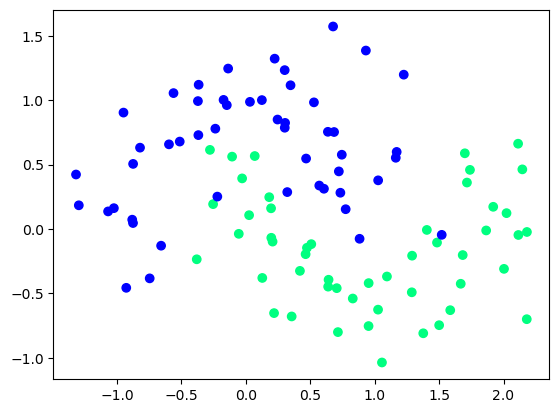

In [120]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0] , X[:,1] ,c = y , cmap = 'winter')

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
clf = LogisticRegression()

In [123]:
clf.fit(X,  y)

LogisticRegression()

In [124]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

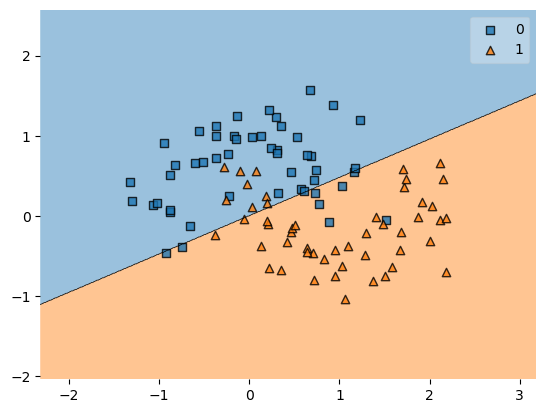

In [125]:
plot_decision_regions(X , y.astype('int'), clf)

In [126]:
import numpy as np
## now finding accuracy 
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf , X , y , scoring='accuracy' , cv = 10))

0.8300000000000001

In [127]:
from sklearn.preprocessing import PolynomialFeatures

In [128]:
pf = PolynomialFeatures(degree=4)

In [129]:
x_trf = pf.fit_transform(X)

In [130]:
clf1 = LogisticRegression()

In [131]:
clf1.fit(x_trf , y)

LogisticRegression()

In [132]:
np.mean(cross_val_score(clf1 , x_trf , y , scoring = 'accuracy' , cv = 10))

0.9

In [133]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(x)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

C:\Users\hs081\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


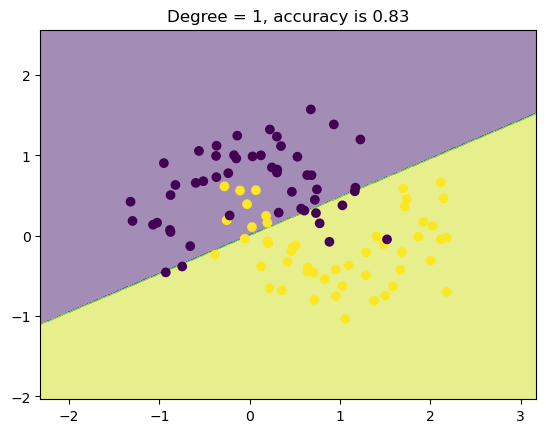

In [134]:
plot_decision_boundary(X,y)

C:\Users\hs081\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


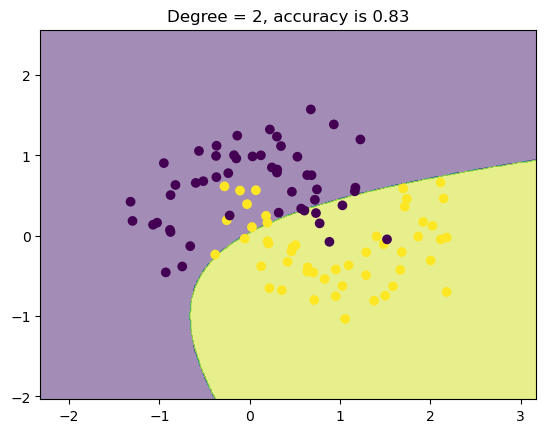

In [135]:
plot_decision_boundary(X,y ,2)

C:\Users\hs081\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


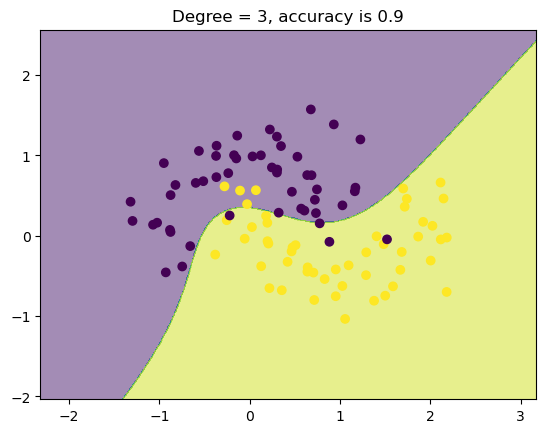

In [136]:
plot_decision_boundary(X,y ,3)

C:\Users\hs081\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


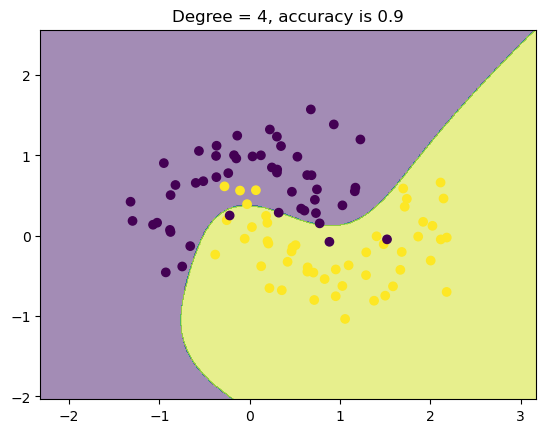

In [137]:
plot_decision_boundary(X,y ,4)

C:\Users\hs081\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


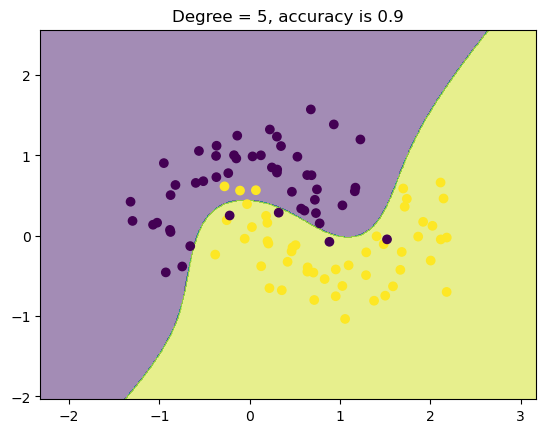

In [138]:
plot_decision_boundary(X,y ,5)

C:\Users\hs081\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hs081\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

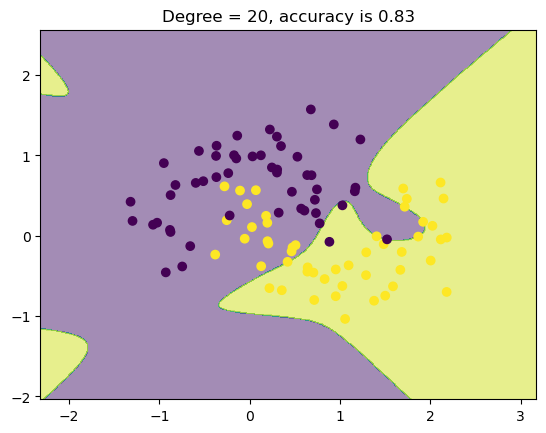

In [139]:
plot_decision_boundary(X,y ,20) ## overfitting 